In [1]:
import qiskit as q
from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
import math as m
%matplotlib inline

In [2]:
c = q.QuantumCircuit(2,2)
c.h([0,1])
c.ry(m.pi*0.3,1)
c.rz(m.pi*0.3,0)

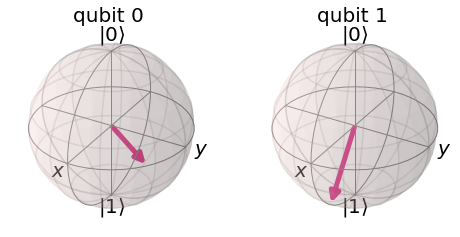

In [3]:
simulator = q.Aer.get_backend('statevector_simulator')
result = q.execute(c,backend=simulator,shots=1024).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

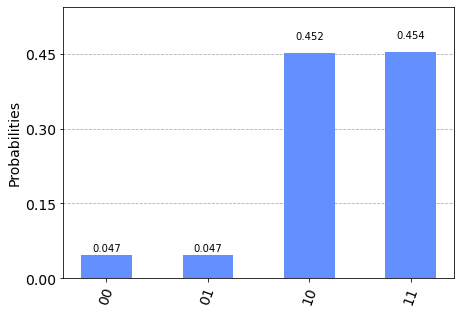

In [35]:
c.measure([0,1],[0,1])
simulator = q.Aer.get_backend('qasm_simulator')
result = q.execute(c,backend=simulator,shots=100000).result()
counts = result.get_counts()
plot_histogram(counts)

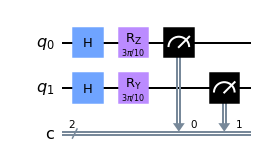

In [5]:
c.draw(output='mpl')

In [7]:
def til_dec(b):
    b = str(b)
    sum = 0
    for i in range(len(b)):
        if b[i] == '1':
            sum = sum + 2**(len(b)-i-1)
        elif b[i] == '0':
            sum = sum
        else:
            print(f'Error! {b[i]} har ikke plass i det binære systemet.')
    return sum

In [28]:
def til_bin(d):
    d = int(d)
    sum = ''
    kvotient = d
    while kvotient > 0:
        rest = kvotient%2
        kvotient = m.floor(kvotient/2)
        sum = sum + str(rest)
    return sum[::-1]

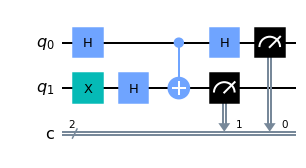

In [63]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.x(1)
c.h(1)
c.cx(0,1)
c.h(0)
c.measure([0,1],[0,1])
simulator = q.Aer.get_backend('qasm_simulator')
result = q.execute(c,backend=simulator,shots=1000000).result()
counts=result.get_counts()
c.draw(output='mpl')

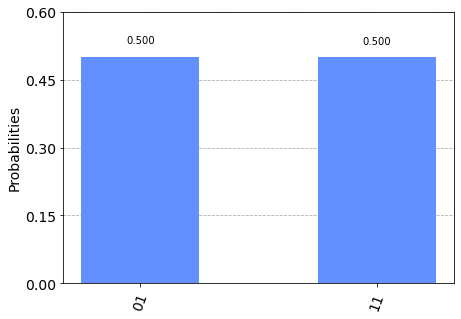

In [64]:
plot_histogram(counts)